**TP Grupal**

Machine Learning

Andrés Vallejo - ing.andavaro@gmail.com

Juan Pablo Nieto Uribe - juanpablonietou@gmail.com

El objetivo de este dataset, es determinar si a una persona determinada le gustaría una determinada canción o no, dependiendo de sus métricas como danzabilidad, duración, energía, entre otros.

Iniciamos instalando e importando las librerías correspondientes. En este punto es importante mencionar que se debe correr primero el primer bloque de código y presionar el botón 'Restart runtime' antes de continuar con la ejecución.

In [1]:
!pip3 install numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 3.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.
cmdstanpy 1.0.4 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


Nota: Ejecutar de aquí en adelante únicamente después de presionar Restart Runtime

In [1]:
import numpy
numpy.__version__

'1.20.0'

In [2]:
!pip install pycaret
!pip install mlflow
!pip install gradio
!pip install jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 4.2 MB/s 
     |████████████████████████████████| 10.4 MB 27.3 MB/s 
     |████████████████████████████████| 2.0 MB 25.5 MB/s 
     |████████████████████████████████| 262 kB 43.8 MB/s 
     |████████████████████████████████| 134 kB 48.6 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 23.5 MB/s 
     |████████████████████████████████| 1.3 MB 41.4 MB/s 
     |████████████████████████████████| 88 kB 3.7 MB/s 
     |████████████████████████████████| 6.8 MB 25.8 MB/s 
     |████████████████████████████████| 17.0 MB 23.3 MB/s 
     |████████████████████████████████| 167 kB 54.9 MB/s 
     |████████████████████████████████| 1.7 MB 44.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  In

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 3.7 MB/s 
     |████████████████████████████████| 2.3 MB 36.8 MB/s 
     |████████████████████████████████| 57 kB 5.9 MB/s 
     |████████████████████████████████| 112 kB 41.9 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 212 kB 59.0 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 275 kB 52.8 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 80 kB 10.7 MB/s 
     |████████████████████████████████| 68 kB 6.4 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |██

In [3]:
import mlflow
import jinja2
from pycaret.classification import *
from pycaret.datasets import get_data
from pycaret.classification import *
#from pycaret.classification import get_data

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics

In [5]:
from pycaret.utils import version
version()

'2.3.10'



---



Se carga el dataset. El Dataset con el que se trabajará es el propuesto para la clase de Análisis de Datos de Spotify. 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
ruta_dataset='/content/drive/MyDrive/UBA/Cursos/3. Tercer Bimestre/2. ML/spotify.csv'
dataset=pd.read_csv(ruta_dataset, error_bad_lines=False)

Se hace un pequeño EDA del dataset.  Podemos observar que el Dataset estaba bastante completo y no fue necesario una mayor corrección de errores, o bien de datos faltantes o mal digitados.

In [8]:
dataset.shape

(750, 10)

In [9]:
dataset.shape[0]

750

Dado que el dataset no tiene una explicación fotmal, se dejaron únicamente las variables de las que estábamos seguros del significado. Es undataset pequeño. Corre bastante rápido, y fácil con AutoML.

In [10]:
dataset

,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,speechiness,tempo,label
0,0.713000,0.514,100125,0.521,0.816000,0.1120,-14.835,0.0444,119.879,1
1,0.192000,0.714,207019,0.614,0.000000,0.2630,-6.935,0.0319,123.969,1
2,0.333000,0.630,216200,0.455,0.000004,0.1270,-9.290,0.0292,139.931,1
3,0.601000,0.810,136413,0.221,0.210000,0.1840,-11.005,0.0429,109.960,1
4,0.883000,0.465,181440,0.459,0.000173,0.0692,-8.137,0.0351,90.807,1
...,...,...,...,...,...,...,...,...,...,...
745,0.000175,0.374,333827,0.943,0.000156,0.1250,-4.108,0.0556,112.084,0
746,0.001970,0.487,213000,0.867,0.006020,0.0968,-3.293,0.0543,160.048,0
747,0.916000,0.605,125867,0.314,0.000000,0.3590,-7.631,0.0327,138.148,1
748,0.168000,0.700,249493,0.823,0.000028,0.1220,-6.892,0.0373,144.060,1


In [11]:
porcentaje=1
numeroSamples=(dataset.shape[0])*porcentaje
dataset2=dataset.sample(n=int(numeroSamples))
dataset2.shape[0]

750

In [12]:
print(dataset2.shape)
print(dataset2.shape[0])

(750, 10)
750


Revisamos que no haya datos vacíos

Vemos que no es un dataset en el que fuere necesario borrar ninguna fila o columna a los fines de evitar toparnos con Nans.

In [13]:
dataset.isna().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
label               0
dtype: int64

Revisamos que el dataset sea balanceado

In [14]:

print('El porcentaje de canciones marcadas es ',100*(dataset['label'].sum()/dataset2.shape[0]),'. No será necesario entrar a corregir clases desbalanceadas')

El porcentaje de canciones marcadas es  60.266666666666666 . No será necesario entrar a corregir clases desbalanceadas


Finalmente revisamos que no haya datos mal etiquetados

In [15]:
dataset.nunique()

acousticness        596
danceability        458
duration            717
energy              502
instrumentalness    431
liveness            445
loudness            710
speechiness         457
tempo               729
label                 2
dtype: int64

Dado que encontramos que solo hay 2 datos en etiquetas, sabemos que no hay ningún dato con una etiqueta distinta a 1 o 0.

Veamos ahora la matriz de correlación:

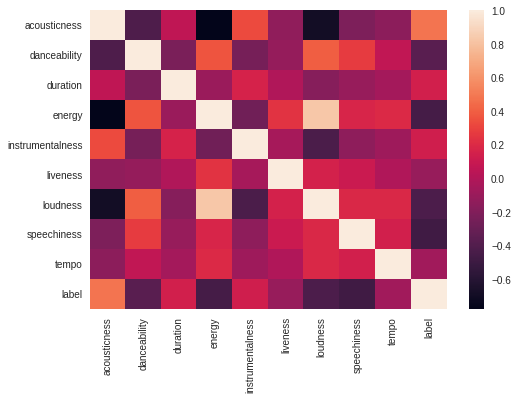

In [16]:
matCorr=dataset.corr()
sns.heatmap(matCorr)

De esta matriz podemos observar cuáles son las características más importantes para esta persona en particular. Que las canciones sean acústicas toma entonces un rol preponderante en este sentido. Ahora veamos el pairplot:

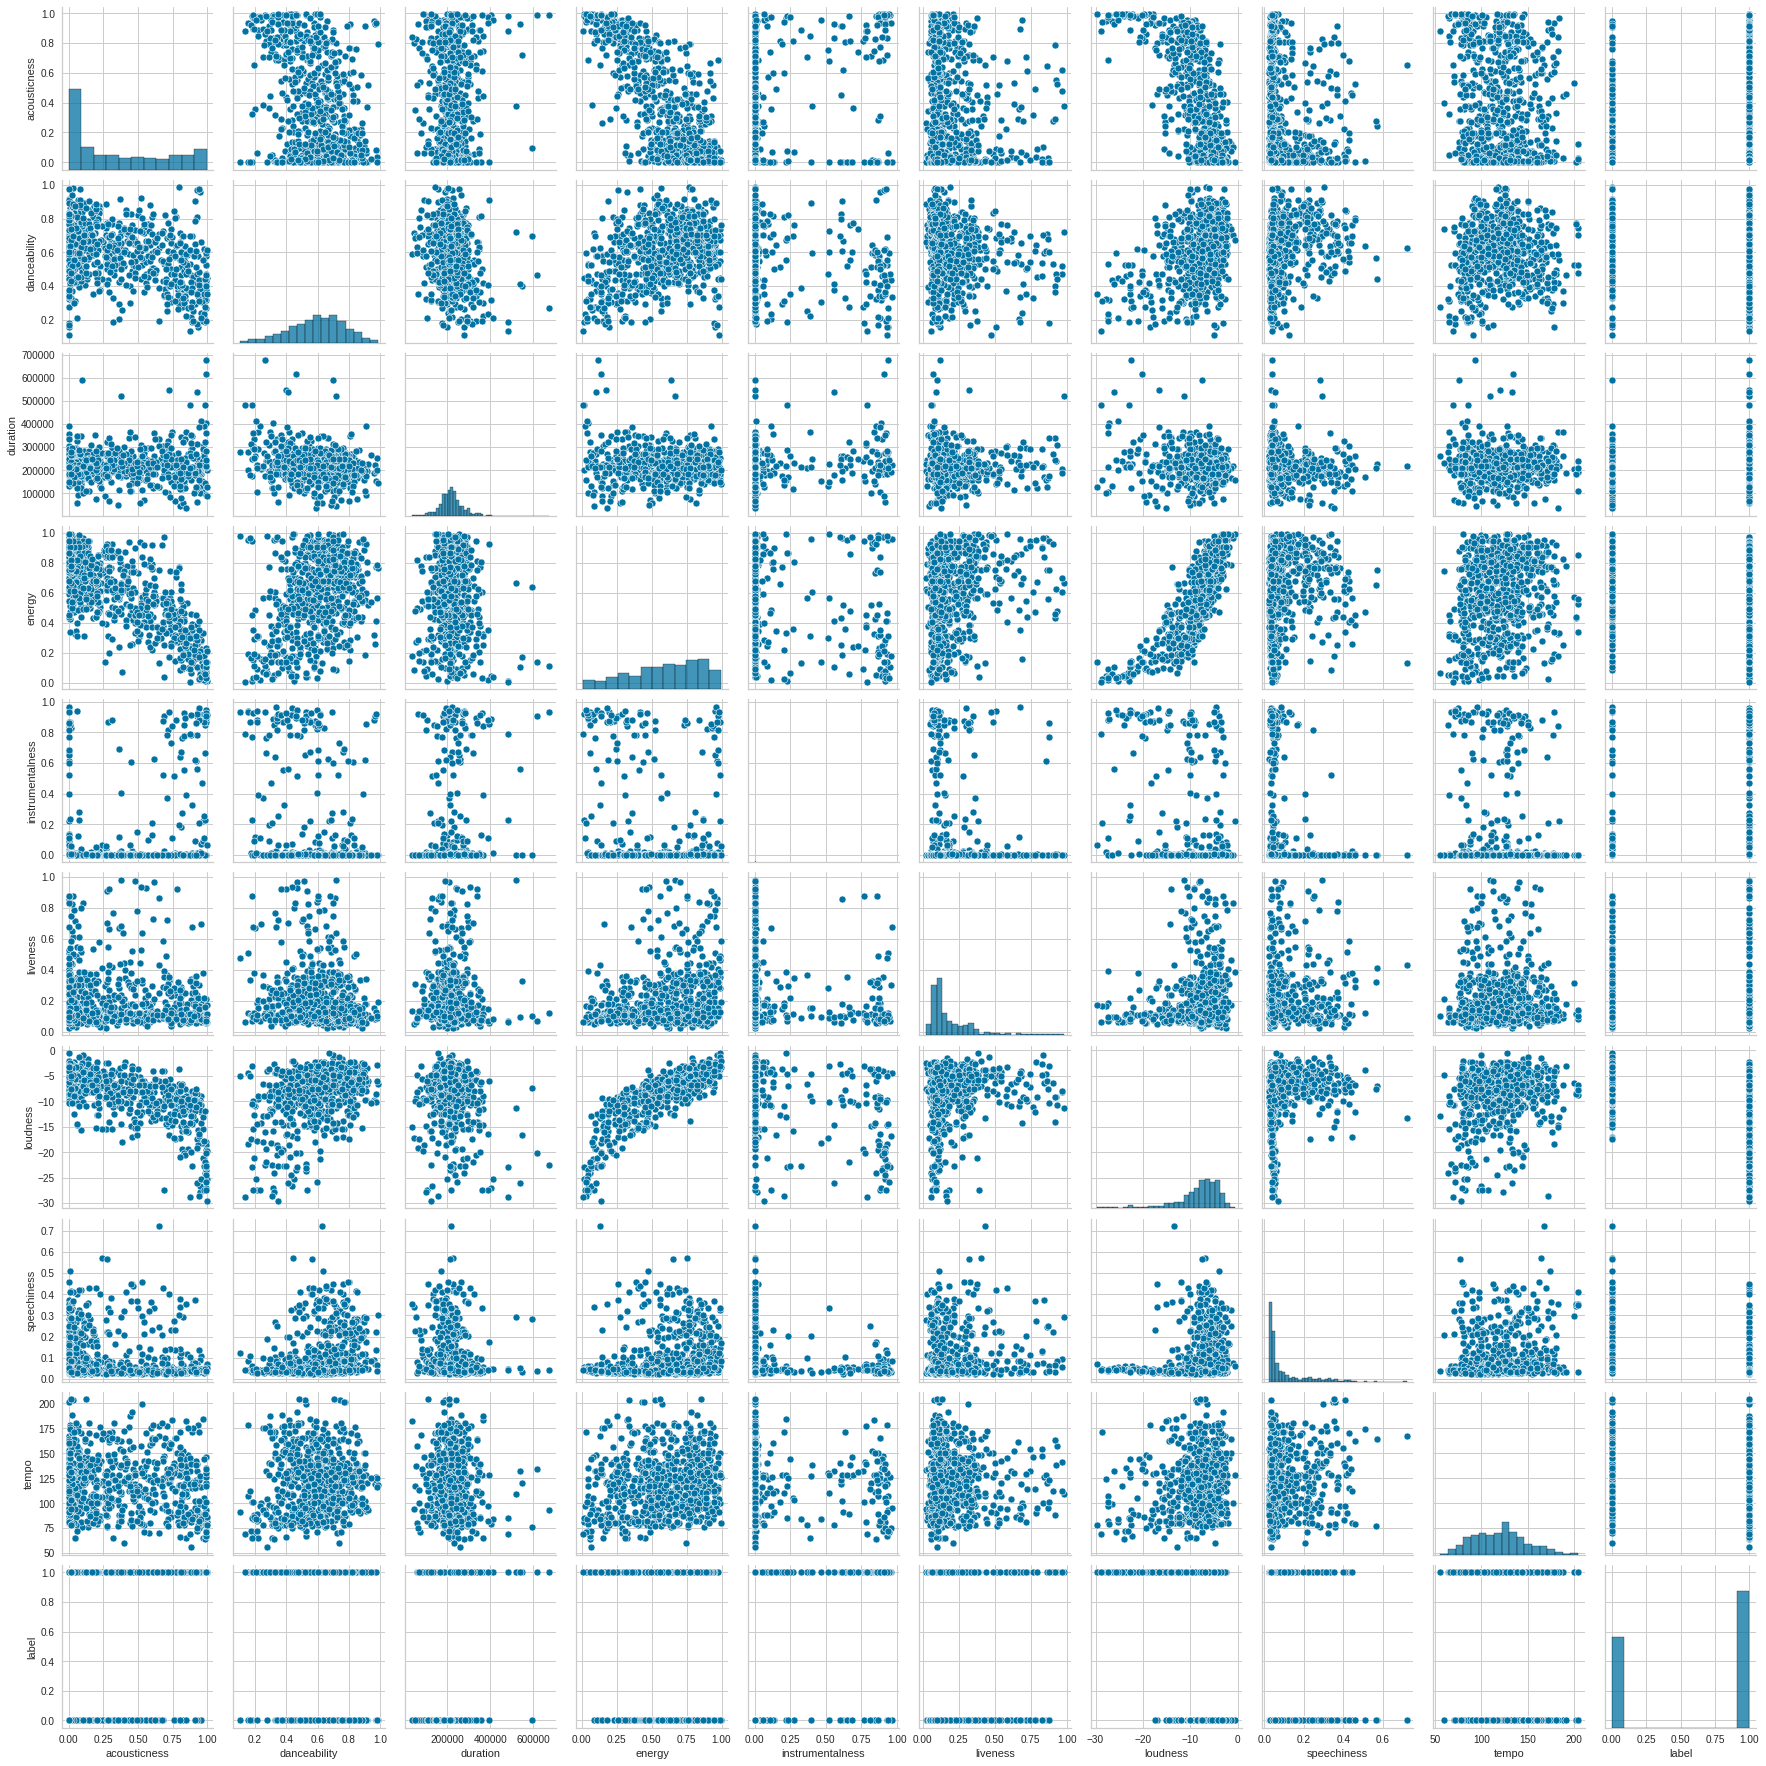

In [17]:
sns.pairplot(dataset)

A pesar de que este plot nos podría dar un insight muy valioso en el análisis de esta información, particularmente respecto al label de la canción (que es nuestra variable dependiente), en este caso no se encuentra ninguna agrupación lo suficientemente fuerte para determinar "a ojo" cuál será la relación entre las variables independientes y si le gusta o no a nuestro sujeto.

Usemos ahora AutoML a fin de guiarnos en cuáles son los mejores modelos para utilizar con nuestro dataset. 

In [17]:
clf1=setup(dataset2,target='label',log_experiment = True, experiment_name = 'spotify1',use_gpu=True)

,Description,Value
0,session_id,1956
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(750, 10)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
2022/08/20 03:51:21 INFO mlflow.tracking.fluent: Experiment with name 'spotify1' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='label',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                num

In [18]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8568,0.9197,0.8820,0.8790,0.8798,0.7025,0.7042,1.079
et,Extra Trees Classifier,0.8531,0.9240,0.8950,0.8641,0.8785,0.6927,0.6959,1.067
gbc,Gradient Boosting Classifier,0.8417,0.9149,0.8822,0.8570,0.8683,0.6698,0.6730,0.192
lightgbm,Light Gradient Boosting Machine,0.8398,0.9008,0.8822,0.8541,0.8671,0.6655,0.6682,0.074
ridge,Ridge Classifier,0.8170,0.0000,0.8599,0.8394,0.8481,0.6176,0.6219,0.018
lda,Linear Discriminant Analysis,0.8169,0.8871,0.8695,0.8330,0.8494,0.6159,0.6209,0.015
ada,Ada Boost Classifier,0.7900,0.8630,0.8369,0.8172,0.8232,0.5630,0.5719,0.131
qda,Quadratic Discriminant Analysis,0.7882,0.8681,0.7766,0.8564,0.8136,0.5697,0.5748,0.014
dt,Decision Tree Classifier,0.7845,0.7810,0.7991,0.8327,0.8145,0.5577,0.5600,0.016
lr,Logistic Regression,0.6545,0.6724,0.8940,0.6657,0.7568,0.1988,0.2107,0.026


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1956, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


Observamos el papel protagónico que toma el modelo de random forest y el Extra Trees Classifier. Pasemos a implementarlos.

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier


In [20]:
#Comenzamos a eliminar la variable objetivo de los features
etiquetas=dataset['label']
etiquetasNp=np.array(etiquetas)
dataset=dataset.drop('label',axis=1)
datasetNp=np.array(dataset)
dataset.head()

,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,0.713,0.514,100125,0.521,0.816000,0.1120,-14.835,0.0444,119.879
1,0.192,0.714,207019,0.614,0.000000,0.2630,-6.935,0.0319,123.969
2,0.333,0.630,216200,0.455,0.000004,0.1270,-9.290,0.0292,139.931
3,0.601,0.810,136413,0.221,0.210000,0.1840,-11.005,0.0429,109.960
4,0.883,0.465,181440,0.459,0.000173,0.0692,-8.137,0.0351,90.807


Dividimos el dataset en train, test y validation

In [21]:
porcentaje_train=60/100
porcentaje_test=30/100
porcentaje_valid=10/100
porcentaje_test_b=(porcentaje_test)/(porcentaje_test+porcentaje_valid)

etiquetas_train,etiquetas_splitter,dataset_train,dataset_splitter=train_test_split(etiquetasNp,datasetNp,train_size = porcentaje_train,random_state=1)
etiquetas_test,etiquetas_valid,dataset_test,dataset_valid=train_test_split(etiquetas_splitter,dataset_splitter,train_size=porcentaje_test_b,random_state=1)

Comenzamos con el Random Forest Regressor

In [22]:
randomForest=RandomForestRegressor(n_estimators=1, random_state=0)
randomForest.fit(dataset_train, etiquetas_train);

In [23]:
dataset_valid

array([[ 4.09000e-01,  6.13000e-01,  1.85767e+05,  6.16000e-01,
         0.00000e+00,  3.98000e-01, -5.78400e+00,  4.10000e-02,
         1.33957e+02],
       [ 3.29000e-03,  6.88000e-01,  2.79829e+05,  8.19000e-01,
         1.80000e-05,  9.43000e-02, -6.93500e+00,  5.58000e-02,
         1.46003e+02],
       [ 1.37000e-01,  6.66000e-01,  2.11931e+05,  9.48000e-01,
         0.00000e+00,  1.92000e-01, -2.77600e+00,  6.38000e-02,
         1.00996e+02],
       [ 6.01000e-02,  6.85000e-01,  2.05280e+05,  8.03000e-01,
         0.00000e+00,  5.46000e-01, -4.25100e+00,  1.56000e-01,
         1.07005e+02],
       [ 6.82000e-01,  4.27000e-01,  2.97933e+05,  3.77000e-01,
         0.00000e+00,  1.05000e-01, -8.13600e+00,  3.34000e-02,
         1.25081e+02],
       [ 9.16000e-01,  6.05000e-01,  1.25867e+05,  3.14000e-01,
         0.00000e+00,  3.59000e-01, -7.63100e+00,  3.27000e-02,
         1.38148e+02],
       [ 9.92000e-01,  5.25000e-01,  2.28253e+05,  5.53000e-02,
         9.33000e-01,  9.34000

In [31]:

#etiquetas_test.reshape(1,-1)
predRF=randomForest.predict(dataset_test)
print(predRF)

[1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0.]


In [26]:
predRF.shape

(224,)

In [27]:
dataset_test.shape[1]

9

In [28]:
predRF

array([1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0.])

In [32]:
print("Precisión Random Forest Regressor: ", metrics.accuracy_score(etiquetas_test, predRF), "%")

Precisión Random Forest Regressor:  0.6964285714285714 %


Comenzamos con el Random Forest Classifier

In [33]:
RFclassifier = RandomForestClassifier(n_estimators = 1, random_state=0) 
RFclassifier.fit(dataset_train, etiquetas_train)
y_pred = RFclassifier.predict(dataset_test)
print(y_pred)

[1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0
 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1
 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1
 0 0]


In [34]:
y_pred.shape

(224,)

In [35]:
print(etiquetas_train.shape)
print(etiquetas_splitter.shape)
print(dataset_train.shape)
print(dataset_splitter.shape)
print(etiquetas_test.shape)
print(etiquetas_valid.shape)
print(dataset_test.shape)
print(dataset_valid.shape)

(450,)
(300,)
(450, 9)
(300, 9)
(224,)
(76,)
(224, 9)
(76, 9)


In [37]:
print(etiquetas_test)

[0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1
 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0
 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1
 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1
 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1
 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1
 0 0]


In [38]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve, precision_score, recall_score, f1_score

In [36]:

print("Precisión Random Forest Classifier: ", metrics.accuracy_score(etiquetas_test, y_pred),"%")

Precisión Random Forest Classifier:  0.7321428571428571 %


In [39]:
RF_proba = RFclassifier.predict_proba(dataset_test)

In [40]:
print(classification_report(etiquetas_test, y_pred))
print('ROC:',np.round(roc_auc_score(etiquetas_test,RF_proba[:,1]),4))
precision, recall,threshold=precision_recall_curve(etiquetas_test,RF_proba[:,1]);
print('Precision-Recall:',np.round(auc(recall,precision),4))


              precision    recall  f1-score   support

           0       0.71      0.63      0.67        95
           1       0.75      0.81      0.78       129

    accuracy                           0.73       224
   macro avg       0.73      0.72      0.72       224
weighted avg       0.73      0.73      0.73       224

ROC: 0.7189
Precision-Recall: 0.833


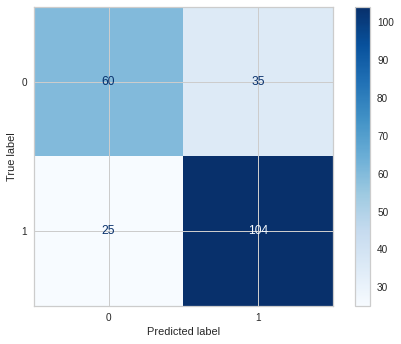

In [41]:
plot_confusion_matrix(RFclassifier,dataset_test,etiquetas_test,cmap='Blues');

Extra Tree

In [42]:
xresp,yresp=make_classification(n_features=9)
extraArboles = ExtraTreesClassifier(n_estimators=1, random_state=0)
extraArboles.fit(dataset_train,etiquetas_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [43]:
prediccionExtraArboles=extraArboles.predict(dataset_test)
print(prediccionExtraArboles)

[0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1
 0 0]


In [44]:
print("Precisión Extra Trees: ", metrics.accuracy_score(etiquetas_test, prediccionExtraArboles),"%")

Precisión Extra Trees:  0.7410714285714286 %


In [45]:
ET_proba = extraArboles.predict_proba(dataset_test)
print(classification_report(etiquetas_test, prediccionExtraArboles))
print('ROC:',np.round(roc_auc_score(etiquetas_test,ET_proba[:,1]),4))
precision, recall,threshold=precision_recall_curve(etiquetas_test,ET_proba[:,1]);
print('Precision-Recall:',np.round(auc(recall,precision),4))


              precision    recall  f1-score   support

           0       0.70      0.68      0.69        95
           1       0.77      0.78      0.78       129

    accuracy                           0.74       224
   macro avg       0.73      0.73      0.73       224
weighted avg       0.74      0.74      0.74       224

ROC: 0.7336
Precision-Recall: 0.8395


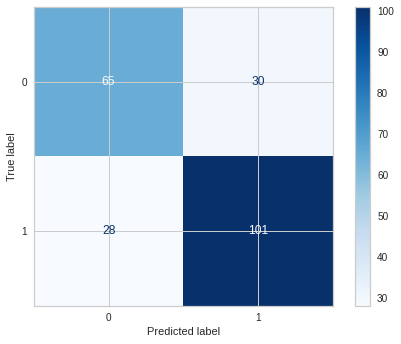

In [46]:
plot_confusion_matrix(extraArboles,dataset_test,etiquetas_test,cmap='Blues');

Gradient Boosting

In [47]:
clf = GradientBoostingClassifier(n_estimators=1, learning_rate=1.0,max_depth=1, random_state=0).fit(dataset_train, etiquetas_train)

In [48]:
prediccionClf=clf.predict(dataset_test)
print(prediccionClf)

[1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 0]


In [49]:
print("Precisión Gradient Boosting: ", metrics.accuracy_score(etiquetas_test, prediccionClf),"%")

Precisión Gradient Boosting:  0.7276785714285714 %


In [50]:
GB_proba = clf.predict_proba(dataset_test)
print(classification_report(etiquetas_test, prediccionClf))
print('ROC:',np.round(roc_auc_score(etiquetas_test,GB_proba[:,1]),4))
precision, recall,threshold=precision_recall_curve(etiquetas_test,GB_proba[:,1]);
print('Precision-Recall:',np.round(auc(recall,precision),4))


              precision    recall  f1-score   support

           0       0.89      0.41      0.56        95
           1       0.69      0.96      0.80       129

    accuracy                           0.73       224
   macro avg       0.79      0.69      0.68       224
weighted avg       0.77      0.73      0.70       224

ROC: 0.6859
Precision-Recall: 0.8362


In [51]:
print(clf)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [52]:
print(etiquetas_test)

[0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1
 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0
 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1
 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1
 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1
 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1
 0 0]


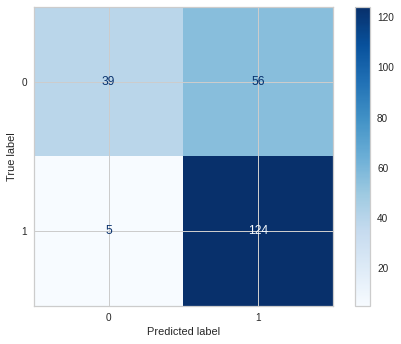

In [53]:
plot_confusion_matrix(clf,dataset_test,etiquetas_test,cmap='Blues');

Finalmente, y una vez analizados varios modelos, tendremos que el resultado estará dado por el voto de los tres modelos:

In [54]:
def valVoto(media):
  redondo=round(media,0)
  if redondo==1:
    texto='Le Gusta'
  else:
    texto='No le gusta'
  valor=redondo
  return texto, redondo

def voto(modelo1,modelo2,modelo3):
  suma=modelo1+modelo2+modelo3
  return suma/3

valVotoVec=np.vectorize(valVoto)
resultado_t, resultado_n=valVotoVec(voto(prediccionClf,prediccionExtraArboles,y_pred))
print('RESULTADO DE LAS CANCIONES EVALUADAS')
print(resultado_t)
print('-------------------------------------')
print(resultado_n)

RESULTADO DE LAS CANCIONES EVALUADAS
['Le Gusta' 'Le Gusta' 'No le gusta' 'No le gusta' 'No le gusta'
 'No le gusta' 'No le gusta' 'Le Gusta' 'No le gusta' 'Le Gusta'
 'No le gusta' 'Le Gusta' 'Le Gusta' 'Le Gusta' 'Le Gusta' 'Le Gusta'
 'No le gusta' 'Le Gusta' 'Le Gusta' 'Le Gusta' 'No le gusta'
 'No le gusta' 'Le Gusta' 'No le gusta' 'No le gusta' 'Le Gusta'
 'Le Gusta' 'Le Gusta' 'Le Gusta' 'Le Gusta' 'Le Gusta' 'No le gusta'
 'Le Gusta' 'No le gusta' 'No le gusta' 'No le gusta' 'Le Gusta'
 'Le Gusta' 'Le Gusta' 'Le Gusta' 'Le Gusta' 'Le Gusta' 'Le Gusta'
 'Le Gusta' 'Le Gusta' 'No le gusta' 'Le Gusta' 'Le Gusta' 'Le Gusta'
 'Le Gusta' 'No le gusta' 'Le Gusta' 'Le Gusta' 'Le Gusta' 'Le Gusta'
 'No le gusta' 'Le Gusta' 'No le gusta' 'Le Gusta' 'Le Gusta'
 'No le gusta' 'No le gusta' 'Le Gusta' 'Le Gusta' 'Le Gusta'
 'No le gusta' 'Le Gusta' 'Le Gusta' 'No le gusta' 'Le Gusta' 'Le Gusta'
 'Le Gusta' 'Le Gusta' 'No le gusta' 'Le Gusta' 'No le gusta'
 'No le gusta' 'Le Gusta' 'No le gu

In [55]:
from collections import Counter
Counter(resultado_t)

Counter({'Le Gusta': 156, 'No le gusta': 68})

In [56]:
confusion_matrix(etiquetas_test, resultado_n)

array([[ 52,  43],
       [ 16, 113]])

Por último hacemos una predicción sobre el dataset de validación